In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

Задание 1.

In [2]:
def matrix_multiplication(A, B):
    A = np.array(A)
    B = np.array(B)
    return ((np.vsplit(A, len(A)) * B.T).T).sum(axis = 0).T

Тестирование и проверка эффективности работы функции:

In [3]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)

print(np.abs(C1 - C2).sum())

Wall time: 549 ms
Wall time: 1.12 s
Wall time: 2.31 ms
Wall time: 1min 18s
3.249667202e-10


Задание 2.

In [4]:
def cumavg(X):
    return np.cumsum(X) / np.arange(1, len(X) + 1)

Построим график зависимости S(k) от k

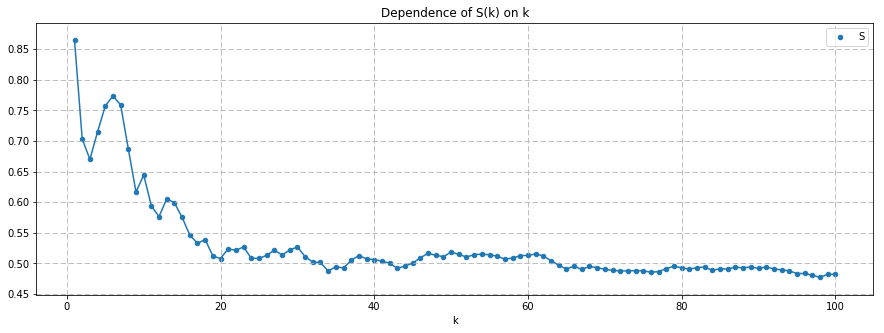

In [5]:
S = cumavg(sps.uniform.rvs(size=100))

plt.figure(figsize=(15, 5))
plt.scatter(np.arange(1, 101), S, s = 20, label='S') 
plt.plot(np.arange(1, 101), S)
plt.legend()
plt.xlabel('k') 
plt.title('Dependence of S(k) on k')  
plt.grid(linestyle='dashed') 
plt.show()

Тестирование функции и проверка её эффективности:

In [6]:
def stupid_cumavg(X):
    S = [0 for i in range(len(X))]
    for i in range(len(X)):
        S[i] = X[i] + S[i - 1]
    for i in range(len(X)):
        S[i] /= i + 1
    return S

X = sps.uniform.rvs(size=10 ** 7)

%time S1 = cumavg(X)
%time S2 = stupid_cumavg(X)

print(np.abs(S1 - S2).sum())

Wall time: 485 ms
Wall time: 31.4 s
0.0


Задание 3.

In [7]:
def avgmin(A):
    return np.amin(A, axis = 0).sum() / len(A[0])

Тестирование функции и проверка её эффективности:

In [8]:
def stupid_avgmin(A):
    N, M = len(A), len(A[0])
    min_col = [min([A[i][j] for i in range(N)]) for j in range(M)]
    return sum(min_col) / M

N, M = 5000, 10000
A = sps.uniform.rvs(size=(N, M))

%time S1 = avgmin(A)
%time S2 = stupid_avgmin(A)

print(np.abs(S1 - S2))

Wall time: 283 ms
Wall time: 1min 7s
1.19262238973e-18


Задание 4.

In [9]:
def func4(X, v=0):
    a = np.copy(X)
    np.place(a, a % 2 == 0, v)
    np.place(a, a % 2 != 0, a[a % 2 != 0][::-1]**2)
    return a

Тестирование функции и проверка её эффективности:

In [10]:
def stupid_func4(X, v=0):
    odd = [elem ** 2 for elem in X if elem % 2]
    new_X = []
    j = len(odd) - 1
    for i in range(len(X)):
        if X[i] % 2:
            new_X.append(odd[j])
            j -= 1
        else:
            new_X.append(v)
    return new_X

X = sps.randint.rvs(size=10 ** 7, low=0, high=100)

%time A1 = func4(X)
%time A2 = stupid_func4(X)

print(np.abs(A1 - A2).sum())

Wall time: 1.79 s
Wall time: 31.2 s
0


Вопрос: За счет чего достигается такая эффективность методов numpy?

Ответ: Большинство методов NumPy написано на языке Си. Поэтому эффективность программы на Python, написанной с использованием методов NumPy, будет равна эффективности программы, написанной на Си.